# Проект: Обучение с учителем: качество модели

<b>Цель проекта:</b> разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

<b>Этапы проекта: </b>
   1. Открыть файлы с данными.
   2. Провести предобработку данных.
   3. Провести исследовательский анализ данных.
   2. Объединить таблицы.
   4. Провести корреляционный анализ признаков данных.
   4. Обучить несколько моделей и выбрать лучшую.
   2. Оценить важность признаков.
   3. Выполнить сегментацию покупателей.

<b> Описание данных: </b>  
Работа ведется с четырьмя датасетами.  

Файл `market_file.csv` содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.  
* `id` — номер покупателя в корпоративной базе данных.
* `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
* `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
* `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
* `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
* `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
* `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
* `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
* `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
* `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
* `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

Файл `market_money.csv`  содержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
* `id` — номер покупателя в корпоративной базе данных.
* `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
* `Выручка` — сумма выручки за период.

Файл `market_time.csv` содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.
* `id` — номер покупателя в корпоративной базе данных.
* `Период` — название периода, во время которого зафиксировано общее время.
* `минут` — значение времени, проведённого на сайте, в минутах.

Файл `money.csv` содержит данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
* `id` — номер покупателя в корпоративной базе данных.
* `Прибыль` — значение прибыли.

Импортируем библиотеки

In [1]:
!pip install -U imbalanced-learn
!pip install -U scikit-learn
!pip install phik -q
!pip install shap
#!pip install scikit-learn==0.24.1 -q;

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import phik
import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelEncoder
)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import shap
from imblearn.over_sampling import RandomOverSampler

### Загрузка данных

Загружаем данные. Если не получилось прочитать файл из локальной папки, то загружаем данные из сети.

In [3]:
try:
    market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
except:
    market_file = pd.read_csv('/datasets/market_file.csv')
    
try:
    market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
except:
    market_money = pd.read_csv('/datasets/market_money.csv')
    
try:
    market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
except:
    market_time = pd.read_csv('/datasets/market_time.csv')
    
try:
    money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep = ';', decimal=',')
except:
    money = pd.read_csv('/datasets/money.csv', sep = ';', decimal=',')

Посмотрим на общую информацию и на первые 5 строчек датасетов

In [4]:
display (market_file.info())
display (market_file.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5]:
display (market_money.info())
display (market_money.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [6]:
display (market_time.info())
display (market_time.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [7]:
display (money.info())
display (money.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


В работе будет использоваться 4 датафрейма. Типы данных соответствуют описанию, кроме стобца `Прибыль` в таблице `money`. В датасетах есть различия в написании десятичных чисел. В датасете `money` в числах используется запятая, в других таблицах точка. В дальнейшем нам необходимо привести названия столбцов к общему виду. Названия будут писаться с маленькой буквы, пробелы между словами заменим на нижнее подчеркивание. 

### Предобработка данных

#### Названия столбцов

Напишем функцию, которая приведет названия столбцов к единому "змеинному регистру".

In [8]:
def transform_column_names(df):
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    return df

Применим функцию

In [9]:
market_file = transform_column_names(market_file)
display (market_file.head())

market_money = transform_column_names(market_money)
display (market_money.head())
    
market_time = transform_column_names(market_time)
display (market_time.head())
    
money = transform_column_names(money)

money['прибыль'] = money['прибыль'].astype(float)
display (money.head())


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


#### Проверка уникальных значений

Посмотрим на уникальные значения в таблицах.

In [10]:
def unique_columns (df, columns):
    for column in columns:
        print(column)
        print(df[column].unique(), '\n')

In [11]:
unique_columns (market_file, ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория'])

покупательская_активность
['Снизилась' 'Прежний уровень'] 

тип_сервиса
['премиум' 'стандартт' 'стандарт'] 

разрешить_сообщать
['да' 'нет'] 

популярная_категория
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника'] 



In [12]:
unique_columns (market_money, ['период'])

период
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц'] 



In [13]:
unique_columns (market_time, ['период'])

период
['текущий_месяц' 'предыдцщий_месяц'] 



В представленных данных есть только опечатки в уникальных значениях. В первой таблице `market_file` исправим опечатку в слове `стандартт` на `стандарт`, в таблице `market_time` исправим `предыдцщий_месяц` на `предыдущий_месяц`. 

In [14]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].str.replace('стандартт', 'стандарт')
market_time['период'] = market_time['период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

#### Проверка пустых значений и дубликатов

Проверим в таблицах пустые значения и явные дубликаты

In [15]:
display (market_file.isna().sum())
display (market_file.duplicated().sum())

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

0

In [16]:
display (market_money.isna().sum())
display (market_money.duplicated().sum())

id         0
период     0
выручка    0
dtype: int64

0

In [17]:
display (market_time.isna().sum())
display (market_time.duplicated().sum())

id        0
период    0
минут     0
dtype: int64

0

In [18]:
display (money.isna().sum())
display (money.duplicated().sum())

id         0
прибыль    0
dtype: int64

0

В таблицах нет пропусков и явных дубликатов.

На всякий случай проверим не явные дубликаты в самой многочисленной, первой, таблице. Помсмотри есть ли повторяющиеся значения id

In [19]:
market_file[market_file.duplicated(subset=['id'], keep=False)]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит


Дубликатов нет.

Таким образом во второй части проекта мы проверили пропуски, дубликаты и уникальные значения в датасетах. Было обнаружено 2  разночтения (тип_сервиса и период) по факту одних и тех же категорий в признаках. Привели в соответсвие написание данных в столбце `прибыль`, таблицы `money`.

### Исследовательский анализ данных

Нам необходимо отобрать таких клиентов, которые покупали что-то в течение трех месяцев. Для этого начнем с таблицы market_money, отберем пользователй, у которых выручка в каждый месяц была больше 0.

In [20]:
buyer = market_money.query('выручка > 0')
buyer = buyer.pivot_table(index='id', values='выручка', aggfunc='count')
buyer = buyer.query('выручка == 3')
buyer = buyer.drop('выручка', axis=1)
buyer.head()

""
id
215349
215350
215351
215352
215353


Мы получили id покупателей, которые совершали покупки в течение 3 месяцев.

#### Статистический анализ таблицы data_buyer

Рассмотрим таблицу которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. Выберем сначала только тех пользователей, которые совершали покупки.

In [21]:
data_buyer = market_file.merge(buyer, on='id', how='inner')

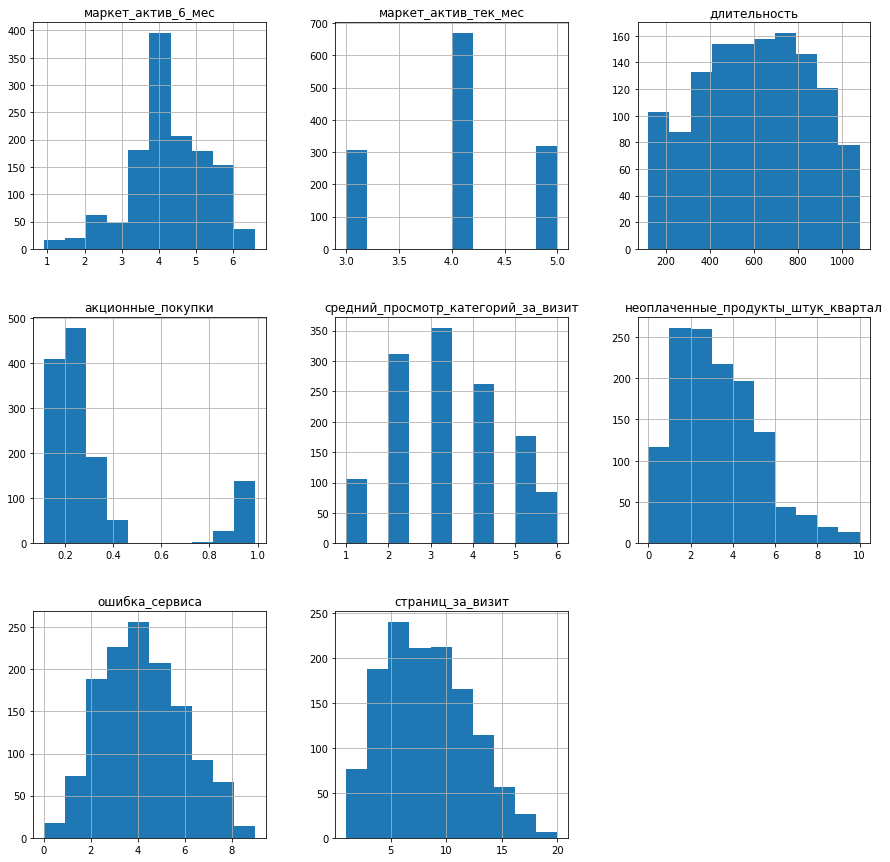

In [22]:
column_hist = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 
               'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
               'ошибка_сервиса', 'страниц_за_визит'
]
data_buyer[column_hist].hist(figsize=(15, 15));

Из гистограмм выше, видно, что в некоторых данных есть выбивающиеся значения. Рассмотрим данные подробнее.

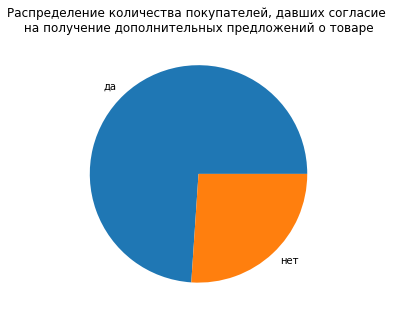

In [23]:
data_buyer.value_counts('разрешить_сообщать').plot(y = 'count', kind='pie', 
                        figsize=(5, 5), label='', title = 'Распределение количества покупателей, давших согласие \
\n на получение дополнительных предложений о товаре ' )
plt.show()

Большинство покупателей соглашаются на рассылку дополнительных предложения о товаре.

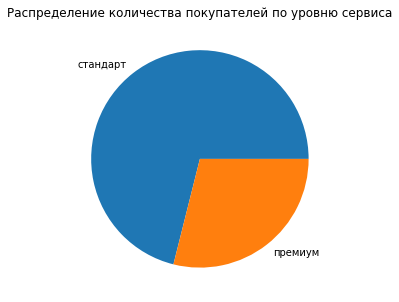

In [24]:
data_buyer.value_counts('тип_сервиса').plot(y = 'count', kind='pie', 
                        figsize=(5, 5), label='', title = 'Распределение количества покупателей по уровню сервиса' )
plt.show()

Большиство покупателей предпочитает пользоваться стандартным уровнем сервиса.

,маркет_актив_6_мес
count,1297.000000
mean,4.254433
std,1.015618
min,0.900000
25%,3.700000
50%,4.200000
75%,4.900000
max,6.600000


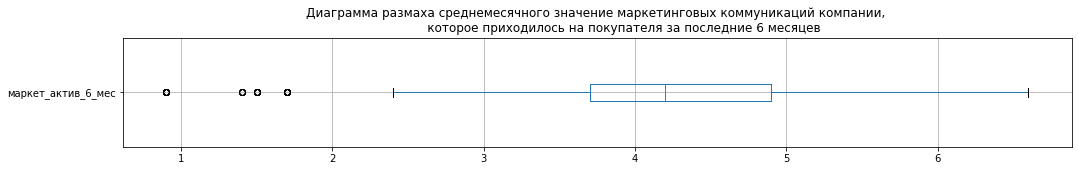

In [25]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data_buyer[['маркет_актив_6_мес']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха среднемесячного значение маркетинговых коммуникаций компании, \n \
             которое приходилось на покупателя за последние 6 месяцев');
display(data_buyer[['маркет_актив_6_мес']].describe())

Есть малые выбивающиеся значения, их трогать не будем.

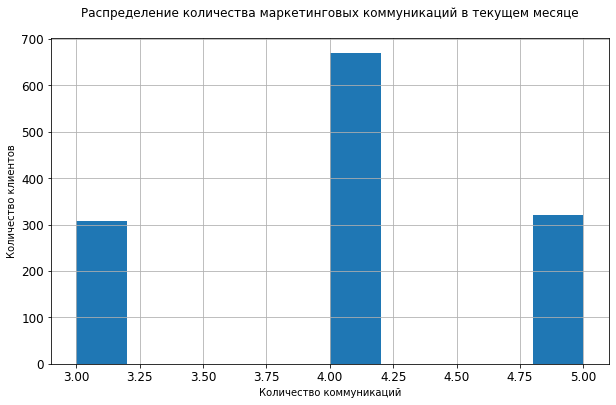

In [26]:
data_buyer['маркет_актив_тек_мес'].plot(kind = 'hist', figsize = (10,6), bins = 10,  fontsize = 12, grid = True, legend = False)
plt.title(label = 'Распределение количества маркетинговых коммуникаций в текущем месяце' + "\n")
plt.ylabel('Количество клиентов')
plt.xlabel('Количество коммуникаций')
plt.show()

,длительность
count,1297.000000
mean,602.993832
std,249.101456
min,121.000000
25%,410.000000
50%,607.000000
75%,806.000000
max,1079.000000


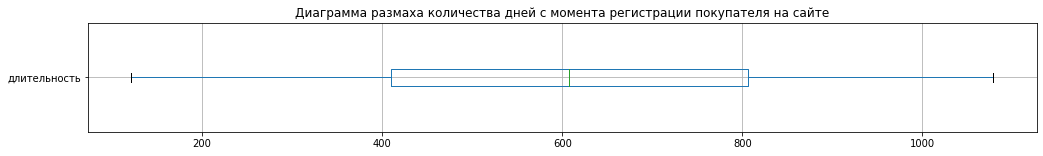

In [27]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data_buyer[['длительность']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха количества дней с момента регистрации покупателя на сайте');
display(data_buyer[['длительность']].describe())

Максимальное значение 1079 дней пользователь зарегистрирован на сайте, минимальное 110. Среднее и медиана практически равны. 601 и 606 дней соответственно.

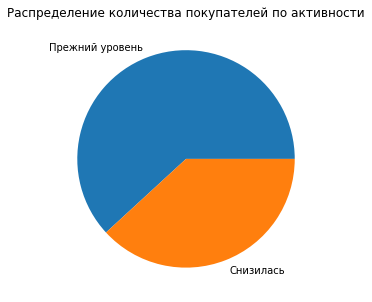

In [28]:
data_buyer.value_counts('покупательская_активность').plot(y = 'count', kind='pie', 
                        figsize=(5, 5), label='', title = 'Распределение количества покупателей по активности' )
plt.show()

В данных большинство покупателей имеют прежний уровень активности. Данные не сбалансированы, но разность не большая.

,акционные_покупки
count,1297.000000
mean,0.320547
std,0.249657
min,0.110000
25%,0.170000
50%,0.240000
75%,0.300000
max,0.990000


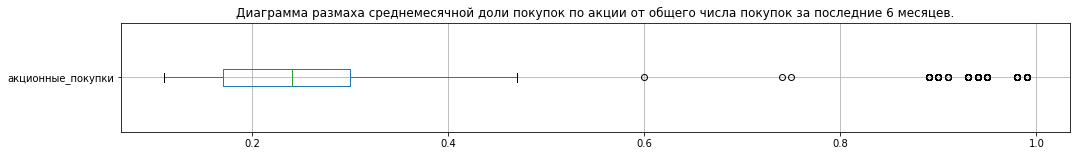

In [29]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data_buyer[['акционные_покупки']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха среднемесячной доли покупок по акции от общего числа покупок за последние 6 месяцев.');
display(data_buyer[['акционные_покупки']].describe())

Есть выбивающиеся значения, посмотрим их ближе

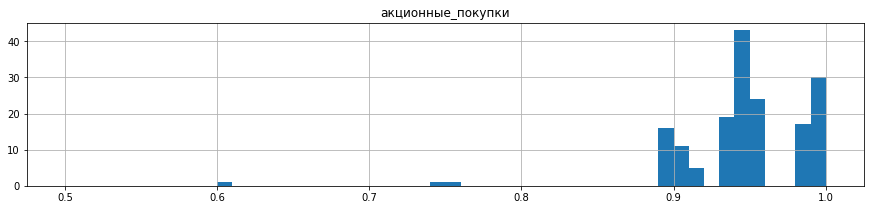

In [30]:
data_buyer[['акционные_покупки']].hist(bins = 50, figsize = (15,3), range = (0.5, 1));

Из диаграм выше можно сделать вывод, что некоторые покупатели предпочитают покупать только акционные товары.

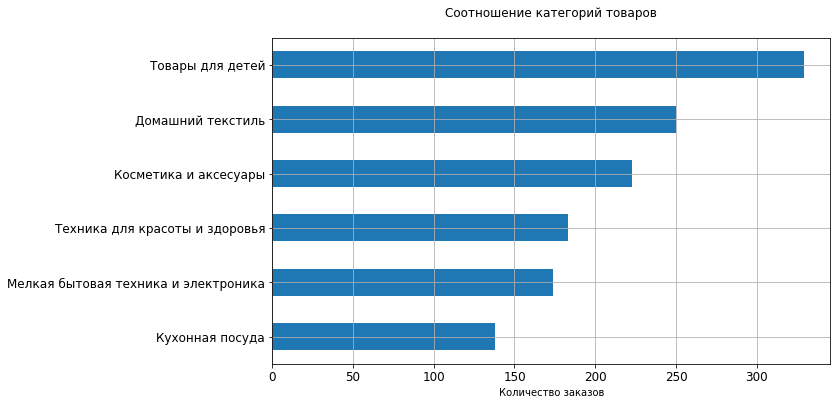

In [31]:
data_buyer.pivot_table(index = 'популярная_категория', values = 'id', aggfunc='count') \
.sort_values(by = 'id', ascending = True) \
.plot(kind = 'barh', figsize = (10,6), fontsize = 12, grid = True, legend = False)
plt.title(label = 'Соотношение категорий товаров' + "\n")
plt.ylabel('')
plt.xlabel('Количество заказов')
plt.show()


Самая популярная категория покупок на сайте это "Товары для детей". Покупатели сделали более 300 заказов по ней. Меньше всего заказывают продукцию из категории "Кухонная посуда".

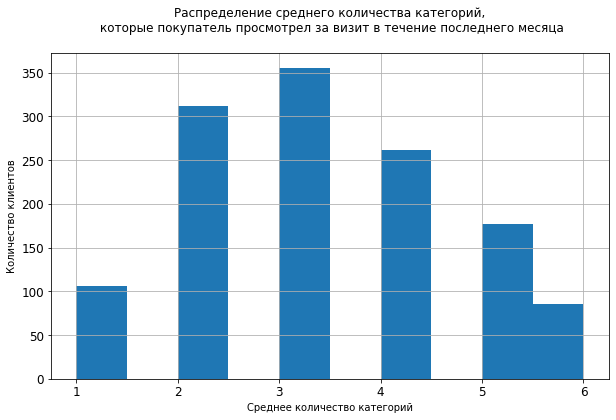

In [32]:
data_buyer['средний_просмотр_категорий_за_визит'].plot(kind = 'hist', figsize = (10,6),\
                                                       bins = 10,  fontsize = 12, grid = True, legend = False)
plt.title(label = 'Распределение среднего количества категорий,\n \
которые покупатель просмотрел за визит в течение последнего месяца' + "\n")
plt.ylabel('Количество клиентов')
plt.xlabel('Среднее количество категорий')
plt.show()

,неоплаченные_продукты_штук_квартал
count,1297.000000
mean,2.841172
std,1.973451
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,10.000000


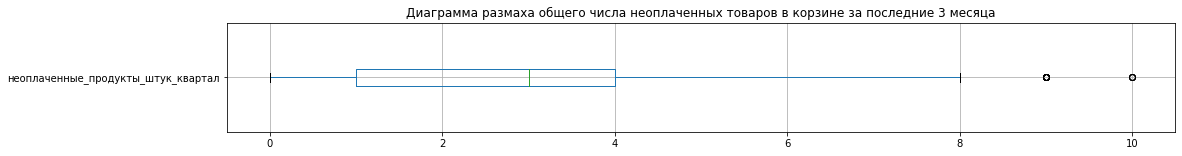

In [33]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data_buyer[['неоплаченные_продукты_штук_квартал']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха общего числа неоплаченных товаров в корзине за последние 3 месяца');
display(data_buyer[['неоплаченные_продукты_штук_квартал']].describe())

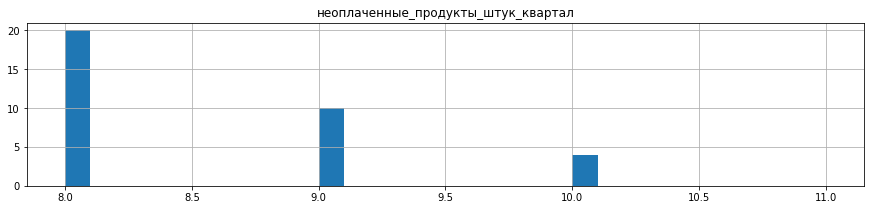

In [34]:
data_buyer[['неоплаченные_продукты_штук_квартал']].hist(bins = 30, figsize = (15,3), range = (8, 11));

Есть выбивающиеся значения, это клиенты у которых в корзине лежит 9 или 10 не оплаченных товаров.

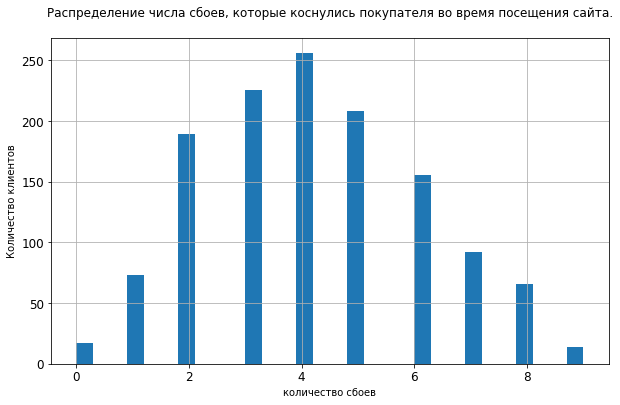

In [35]:
data_buyer['ошибка_сервиса'].plot(kind = 'hist', figsize = (10,6),\
                                                       bins = 30,  fontsize = 12, grid = True, legend = False)
plt.title(label = 'Распределение числа сбоев, которые коснулись покупателя во время посещения сайта.' + "\n")
plt.ylabel('Количество клиентов')
plt.xlabel('количество сбоев')
plt.show()

Как видно из графика количество сбоев имеет нормальное распределение.

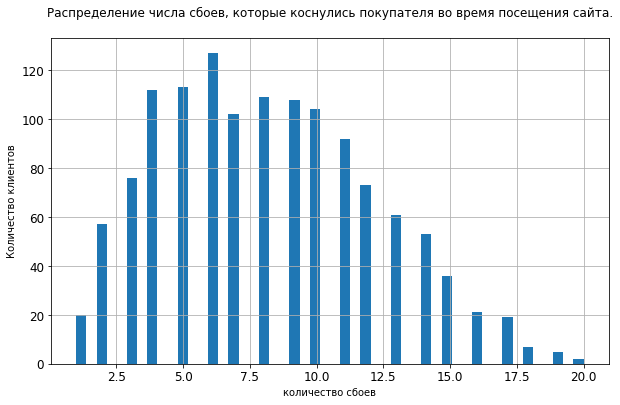

In [36]:
data_buyer['страниц_за_визит'].plot(kind = 'hist', figsize = (10,6),\
                                                       bins = 50,  fontsize = 12, grid = True, legend = False)
plt.title(label = 'Распределение числа сбоев, которые коснулись покупателя во время посещения сайта.' + "\n")
plt.ylabel('Количество клиентов')
plt.xlabel('количество сбоев')
plt.show()

#### Статистический анализ относительно целевого признака

Рассмотрим, как эти данные распределены в контексте целевого признака - покупательской активности.

In [37]:
data_buyer.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


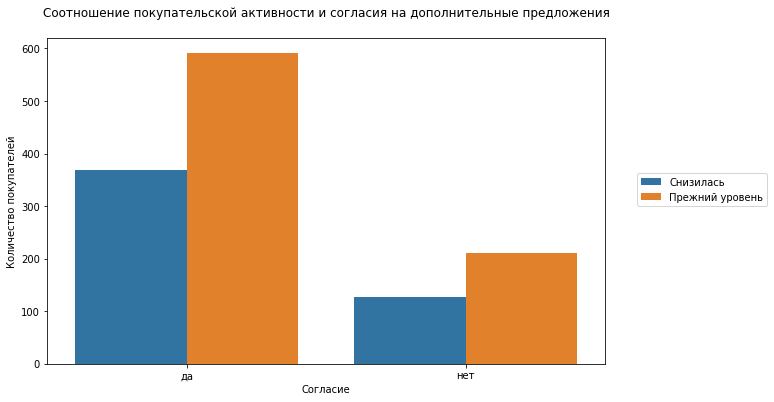

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_buyer, x='разрешить_сообщать', hue='покупательская_активность')
plt.legend(bbox_to_anchor=(1.3, 0.6))
plt.title('Соотношение покупательской активности и согласия на дополнительные предложения' + "\n")
plt.xlabel('Согласие')
plt.ylabel('Количество покупателей')
plt.show()

Пользователи с согласием на получение предложений, больше сохраняют прежний уровень активности.

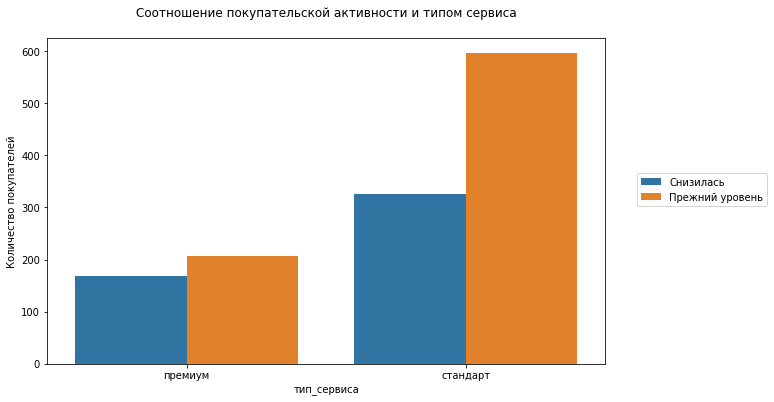

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_buyer, x='тип_сервиса', hue='покупательская_активность')
plt.legend(bbox_to_anchor=(1.3, 0.6))
plt.title('Соотношение покупательской активности и типом сервиса' + "\n")
plt.xlabel('тип_сервиса')
plt.ylabel('Количество покупателей')
plt.show()

Пользователи со стандартным типом сервиса больше сохраняют прежний уровень активности.

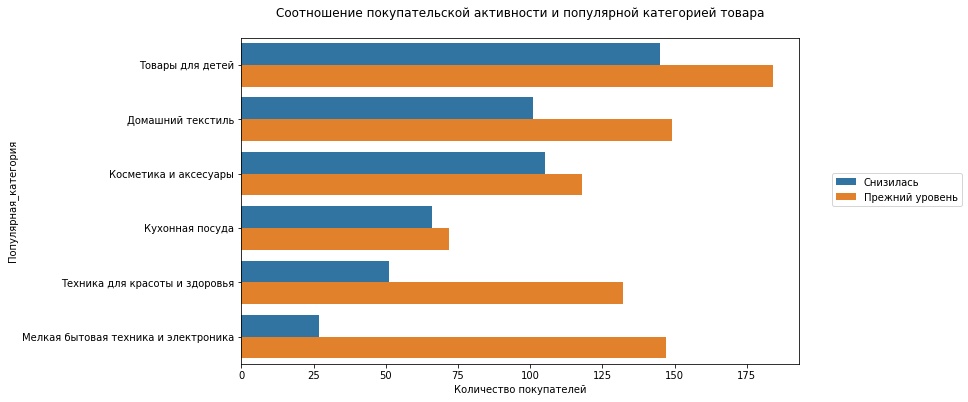

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_buyer, y='популярная_категория', hue='покупательская_активность')
plt.legend(bbox_to_anchor=(1.3, 0.6))
plt.title('Соотношение покупательской активности и популярной категорией товара' + "\n")
plt.ylabel('Популярная_категория')
plt.xlabel('Количество покупателей')
plt.show()

Больше всего прежний уровень активности сохраняется на мелкой бытовой технике и электронике, а так же для товаров для детей.

#### Статистический анализ таблицы data_buyer_money

Рассмотрим таблицу с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

Выберем сначала только тех пользователей, которые совершали покупки.

In [41]:
data_buyer_money = market_money.merge(buyer, on='id', how='inner')
data_buyer.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


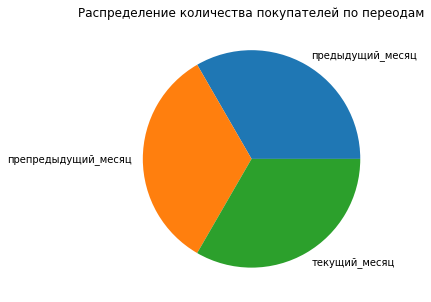

текущий_месяц          1297
предыдущий_месяц       1297
препредыдущий_месяц    1297
Name: период, dtype: int64

In [42]:
data_buyer_money.value_counts('период').plot(y = 'count', kind='pie', 
                        figsize=(5, 5), label='', title = 'Распределение количества покупателей по переодам' )
plt.show()

data_buyer_money['период'].value_counts()

In [43]:
data_buyer_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 3890
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3891 non-null   int64  
 1   период   3891 non-null   object 
 2   выручка  3891 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB


Мы имеем равное распределение по всем периодам.

,выручка
count,3891.000000
mean,5033.718890
std,1768.471286
min,2758.700000
25%,4592.000000
50%,4959.000000
75%,5363.200000
max,106862.200000


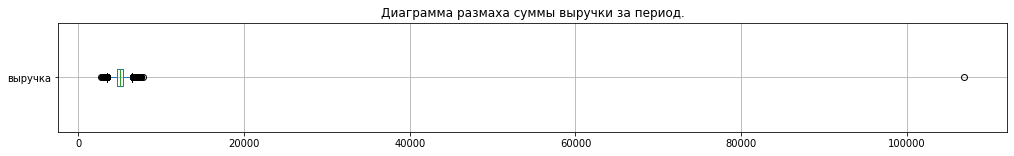

In [44]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data_buyer_money[['выручка']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха суммы выручки за период.')
display(data_buyer_money[['выручка']].describe())

Есть аномально большое значение, посмотрим на него.

In [45]:
display (data_buyer_money.query('выручка > 100000'))

,id,период,выручка
89,215380,текущий_месяц,106862.2


В данных есть один покупатель, совершивший в текущем месяце большую покупку на 106 тысяч рублей. Это аномально высокое значение является ошибкой в данных. Удалим его.

In [46]:
data_buyer_money = data_buyer_money.query('выручка < 100000')

,выручка
count,3890.000000
mean,5007.541902
std,679.235737
min,2758.700000
25%,4592.000000
50%,4959.000000
75%,5363.000000
max,7799.400000


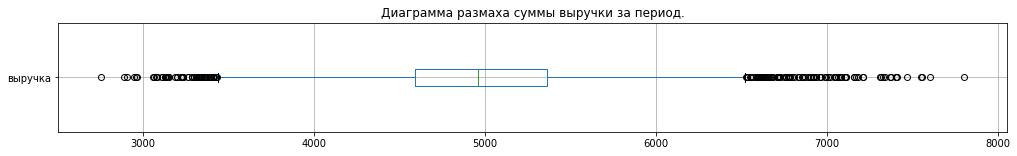

In [47]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data_buyer_money[['выручка']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха суммы выручки за период.')
display(data_buyer_money[['выручка']].describe())

Распределение изменилось. Есть выбивающиеся значения. Их трогать не будем.

Посмотрим на суммарную выручку сайта по всем периодам.

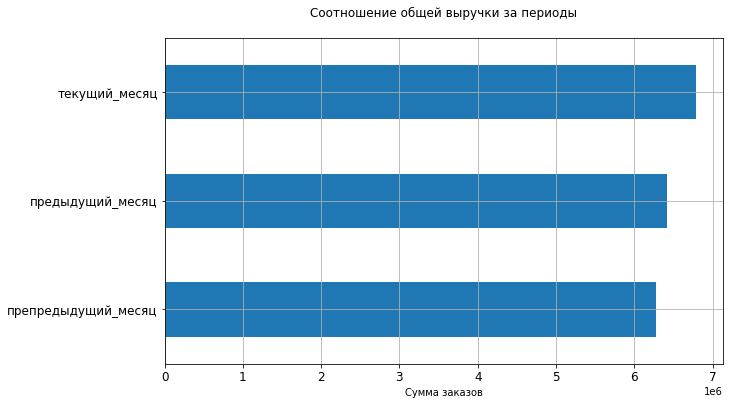

,выручка
период,
препредыдущий_месяц,6272769.0
предыдущий_месяц,6417996.5
текущий_месяц,6788572.5


In [48]:
data_buyer_money.pivot_table(index = 'период', values = 'выручка', aggfunc='sum') \
.sort_values(by = 'выручка', ascending = True) \
.plot(kind = 'barh', figsize = (10,6), fontsize = 12, grid = True, legend = False)
plt.title(label = 'Соотношение общей выручки за периоды' + "\n")
plt.ylabel('')
plt.xlabel('Сумма заказов')
plt.show()

display(data_buyer_money.pivot_table(index = 'период', values = 'выручка', aggfunc='sum') \
.sort_values(by = 'выручка', ascending = True))

В текущем месяце наблюдается сама я высокая выручка из представленного периода.

#### Статистический анализ таблицы data_buyer_time

Рассмотрим таблицу с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

Выберем сначала только тех пользователей, которые совершали покупки.



In [49]:
data_buyer_time = market_time.merge(buyer, on='id', how='inner')

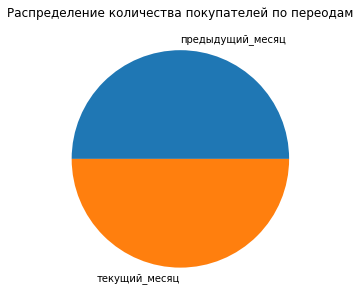

текущий_месяц       1297
предыдущий_месяц    1297
Name: период, dtype: int64

In [50]:
data_buyer_time.value_counts('период').plot(y = 'count', kind='pie', 
                        figsize=(5, 5), label='', title = 'Распределение количества покупателей по переодам' )
plt.show()

data_buyer_time['период'].value_counts()

В таблице представлено 2 периода в равных пропорциях.

,минут
count,2594.000000
mean,13.340401
std,4.081999
min,4.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,23.000000


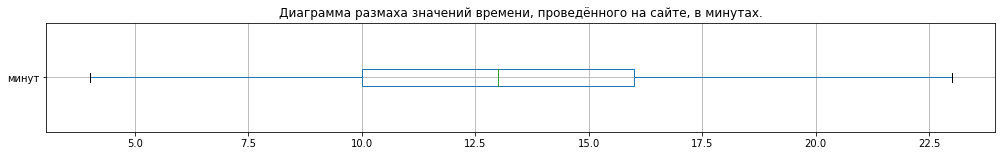

In [51]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data_buyer_time[['минут']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений времени, проведённого на сайте, в минутах.');
display(data_buyer_time[['минут']].describe())

В среднем покупатели проводят на сайте 13 минут. Минимальное значение 4 минуты, максимальное 23.

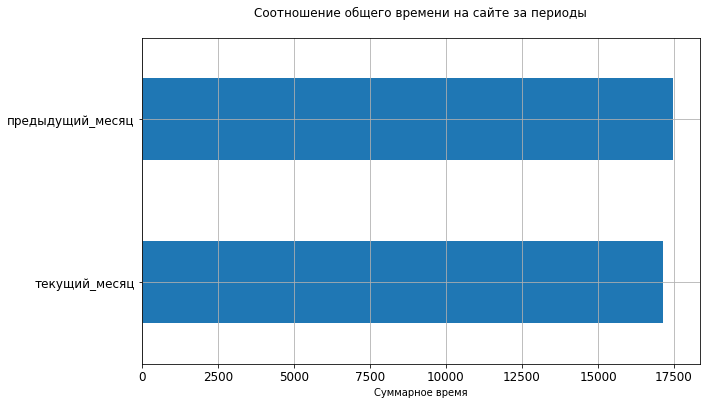

,минут
период,
текущий_месяц,17135
предыдущий_месяц,17470


In [52]:
data_buyer_time.pivot_table(index = 'период', values = 'минут', aggfunc='sum') \
.sort_values(by = 'минут', ascending = True) \
.plot(kind = 'barh', figsize = (10,6), fontsize = 12, grid = True, legend = False)
plt.title(label = 'Соотношение общего времени на сайте за периоды' + "\n")
plt.ylabel('')
plt.xlabel('Суммарное время')
plt.show()

display(data_buyer_time.pivot_table(index = 'период', values = 'минут', aggfunc='sum') \
.sort_values(by = 'минут', ascending = True))

Суммарное время на сайте практически равное за 2 периода.

Исходя из данных таблицы market_money, мы отобрали клиентов, у которых была выручка в каждом из трех месяцев. Это позволяет сосредоточиться на активных пользователях.

Предпочтения по рассылке: Большинство клиентов соглашаются на получение дополнительных предложений о товарах. Это может свидетельствовать о их заинтересованности в новых акциях и предложениях.

Предпочтения по сервису: Большинство клиентов предпочитают использовать стандартный уровень сервиса. Это может быть индикатором их довольства текущими услугами.

Время на сайте: Среднее время регистрации на сайте составляет около 600 дней, при этом есть как пользователи с намного большим, так и с намного меньшим временем с начала регистрации.

Популярность категорий товаров: Самая популярная категория покупок - "Товары для детей", в то время как категория "Кухонная посуда" меньше всего популярна среди клиентов.

Влияние согласия на рассылку: Пользователи, согласившиеся на получение предложений, склонны сохранять свой прежний уровень активности чаще, чем те, кто отказался. Большинство клиентов, сохраняющих прежний уровень активности, предпочитают купить товары из категорий мелкой бытовой техники, электроники и товаров для детей. В текущем месяце наблюдается наибольшая выручка среди всех представленных периодов. Это может быть связано с проведением акций, рекламных кампаний или других мероприятий, привлекших внимание клиентов.

### Объединение таблиц

Объединим таблицы data_buyer и data_buyer_money и data_buyer_time. В итоговой таблице сделаем отдельный столбец для каждого периода.

In [53]:
data_buyer['покупательская_активность_бинарный'] = data_buyer['покупательская_активность'].apply \
(lambda x: 1 if x == "Прежний уровень" else 0)
data_buyer.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,покупательская_активность_бинарный
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,0
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,0
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,0
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,0
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,0


Преобразуем таблицу `data_buyer_money`

In [54]:
data_buyer_money = data_buyer_money.pivot_table(index='id', columns='период', values='выручка').reset_index()

# Удаляем мультииндекс после операции pivot
data_buyer_money.columns.name = None

# Переименуем названия столбцов
data_buyer_money = data_buyer_money.rename(columns={'текущий_месяц': 'текущий_месяц_выручка',
                              'предыдущий_месяц': 'предыдущий_месяц_выручка',
                              'препредыдущий_месяц': 'препредыдущий_месяц_выручка',
                              })

data_buyer_money.head()


,id,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5


In [55]:
data_buyer = pd.merge(data_buyer, data_buyer_money, on='id', how='inner')
data_buyer.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,покупательская_активность_бинарный,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,0,5216.0,4472.0,4971.6
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,0,5457.5,4826.0,5058.4
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,0,6158.0,4793.0,6610.4
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,0,5807.5,4594.0,5872.5
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,0,4738.5,5124.0,5388.5


Аналогично сделаем для таблицы `data_buyer_time`

In [56]:
data_buyer_time = data_buyer_time.pivot_table(index='id', columns='период', values='минут').reset_index()

# Удаляем мультииндекс после операции pivot
data_buyer_time.columns.name = None

# Переименуем названия столбцов
data_buyer_time = data_buyer_time.rename(columns={'текущий_месяц': 'текущий_месяц_минут',
                              'предыдущий_месяц': 'предыдущий_месяц_минут'})

data_buyer = pd.merge(data_buyer, data_buyer_time, on='id', how='inner')
data_buyer.head()


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,покупательская_активность_бинарный,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,0,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,0,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,0,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,0,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,0,4738.5,5124.0,5388.5,10,10


Мы подготовили все данные для анализа и работы.

### Корреляционный анализ


Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделайте выводы о мультиколлинеарности и при необходимости устраните её.

Посмотрим на матрицу корреляций между признаками:

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'покупательская_активность_бинарный', 'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка', 'текущий_месяц_выручка', 'предыдущий_месяц_минут', 'текущий_месяц_минут']


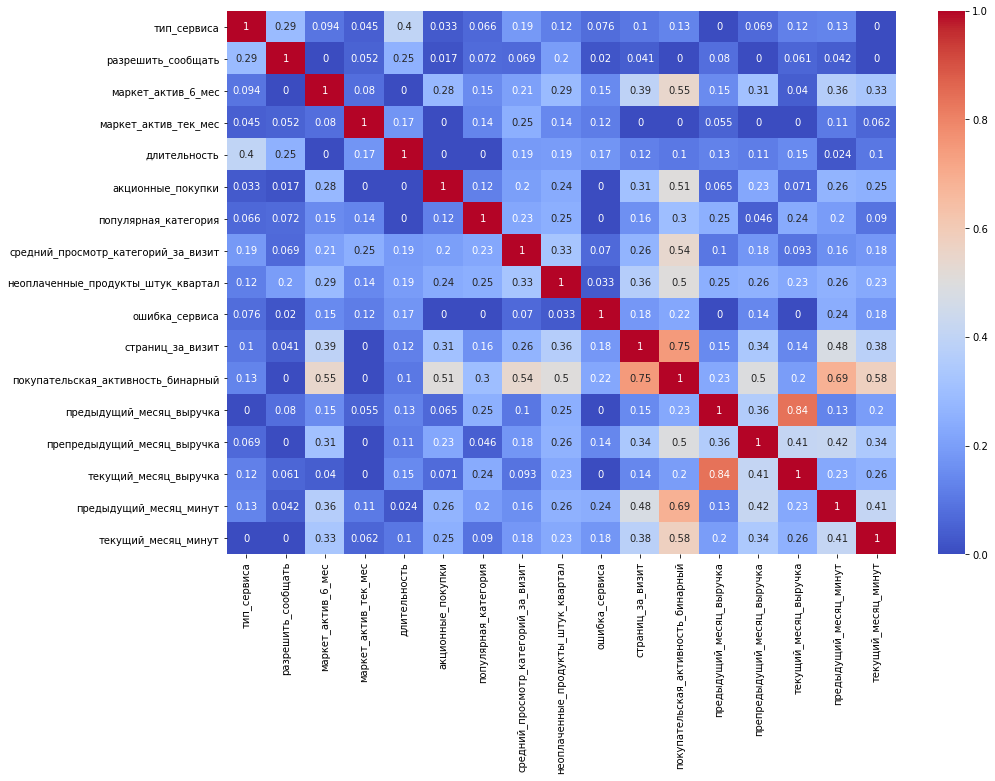

In [57]:
data_buyer.drop(['id','покупательская_активность'], axis=1, inplace=True)

# Вычисление матрицы корреляции с использованием phik
corr_matrix = data_buyer.phik_matrix()

# Визуализация матрицы корреляции

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Очень высоких корреляций (0.9 +) не видно, скорее всего мультиколлинеарности нет.

Так как у нас в данных имеется несколько классов ("снизилась", "прежний уровень"), построи хмитмап отдельно для каждого класса. Проанализировав отдельные хитмапы, мы можем выделить те признаки, которые оказывают влияние внутри каждого из классов таргета. Это может помочь в понимании важности определенных характеристик для принятия решения моделью.


interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'покупательская_активность_бинарный', 'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка', 'текущий_месяц_выручка', 'предыдущий_месяц_минут', 'текущий_месяц_минут']


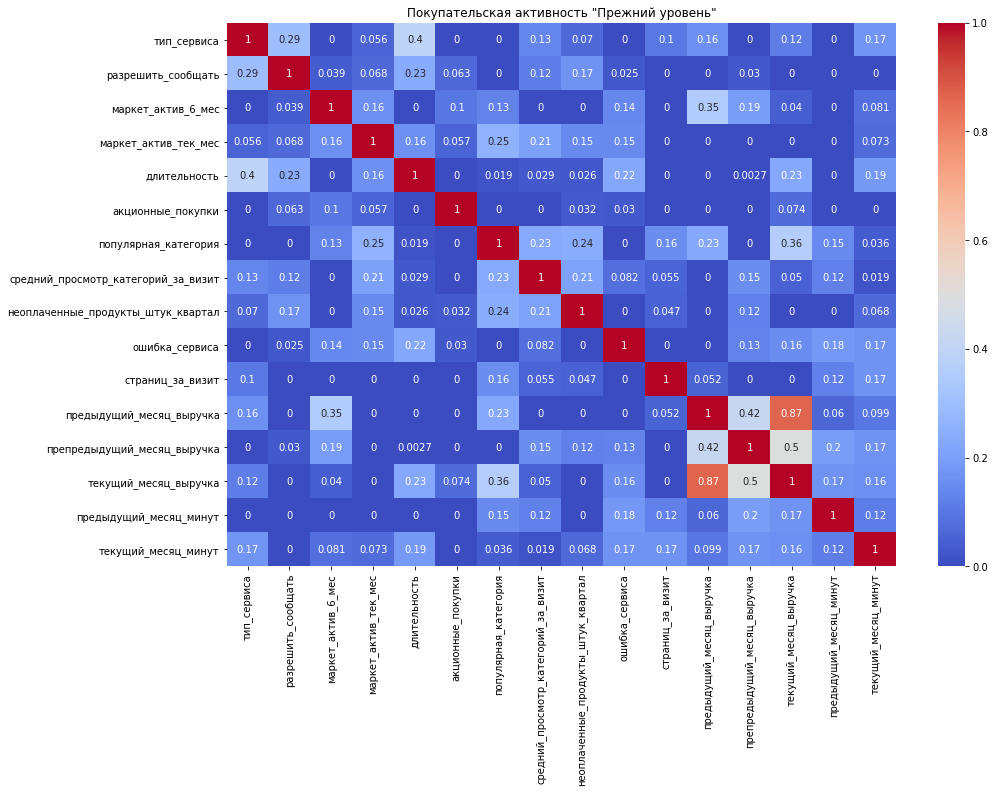

In [58]:
corr_matrix_pr = data_buyer.query('покупательская_активность_бинарный == 1').phik_matrix()

# Визуализация матрицы корреляции

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_pr, annot=True, cmap='coolwarm')
plt.title('Покупательская активность "Прежний уровень"')
plt.show()

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'покупательская_активность_бинарный', 'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка', 'текущий_месяц_выручка', 'предыдущий_месяц_минут', 'текущий_месяц_минут']


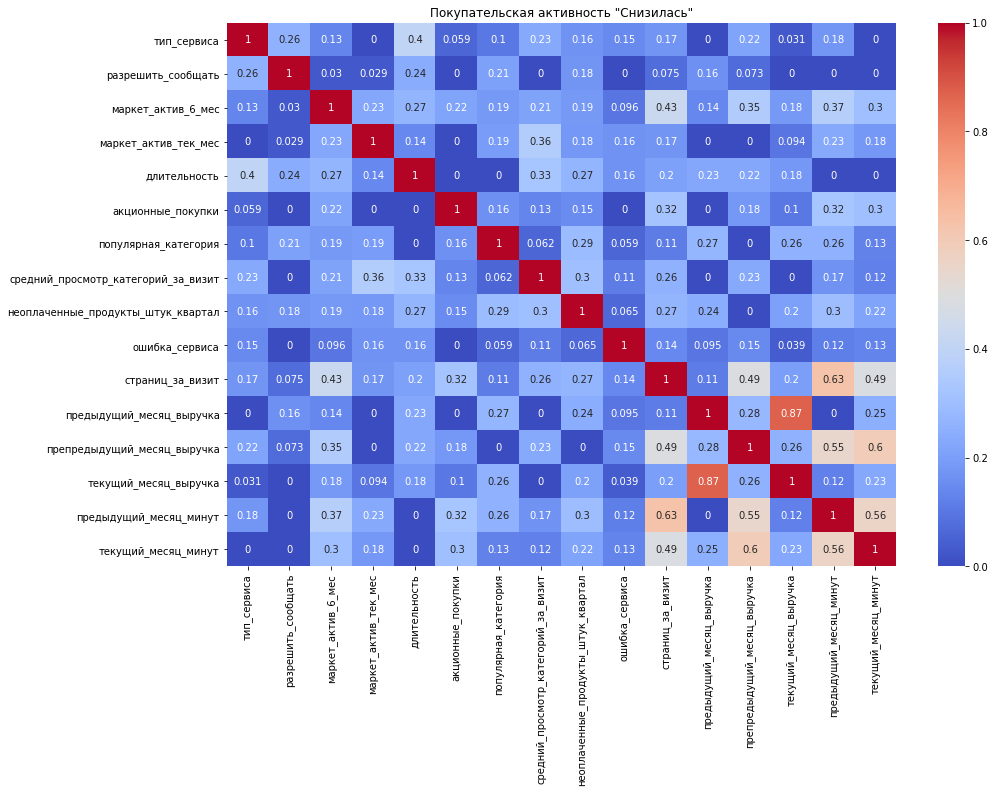

In [59]:
corr_matrix_sn = data_buyer.query('покупательская_активность_бинарный == 0').phik_matrix()

# Визуализация матрицы корреляции

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_sn, annot=True, cmap='coolwarm')
plt.title('Покупательская активность "Снизилась"')
plt.show()

При анализе карт, выявим признаки с большей корреляции и будем их использовать для дальнейшей работы. Признака:
- страниц_за_визит
- маркет_актив_тек_мес
- препредыдущий_месяц_выручка
- акционные_покупки
- предыдущий_месяц_выручка
- текущий_месяц_минут
- предыдущий_месяц_минут
- длительность
- маркет_актив_6_мес

### Использование пайплайнов

Сначала обозначим, какие данные требуют масштабирования, а какие — кодирования. Введём обозначения для типов исходных данных:


In [60]:
data_buyer.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,покупательская_активность_бинарный,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
0,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,0,5216.0,4472.0,4971.6,12,10
1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,0,5457.5,4826.0,5058.4,8,13
2,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,0,6158.0,4793.0,6610.4,11,13
3,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,0,5807.5,4594.0,5872.5,8,11
4,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,0,4738.5,5124.0,5388.5,10,10


In [61]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

# загружаем данные


X_train, X_test, y_train, y_test = train_test_split(
    data_buyer.drop(['покупательская_активность_бинарный'], axis=1),
    data_buyer['покупательская_активность_бинарный'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = data_buyer['покупательская_активность_бинарный']
)

X_train.shape, X_test.shape


((972, 16), (325, 16))

In [62]:
# создаем экземпляр класса RandomOverSampler с фиксированным random_state
sampler = RandomOverSampler(random_state=42)

# сэмплируем данные методов оверсэмплинга одной командой
X_train_sampled, y_train_sampled = sampler.fit_resample(X_train,y_train) 

print(f'Тренировочные данные до сэмплирования:\n{y_train.value_counts()}')
print(f'\nТренировочные данные после сэмплирования:\n{y_train_sampled.value_counts()}')

Тренировочные данные до сэмплирования:
1    601
0    371
Name: покупательская_активность_бинарный, dtype: int64

Тренировочные данные после сэмплирования:
0    601
1    601
Name: покупательская_активность_бинарный, dtype: int64


In [63]:
# создаём списки с названиями признаков
ohe_columns = ['разрешить_сообщать','популярная_категория']
ord_columns = ['тип_сервиса']
num_columns = ['страниц_за_визит', 'маркет_актив_тек_мес', 'препредыдущий_месяц_выручка', 'акционные_покупки', 'предыдущий_месяц_выручка',
    'текущий_месяц_минут', 'предыдущий_месяц_минут', 'длительность', 'маркет_актив_6_мес']

In [64]:
# Создание пайплайна для обработки категориальных признаков
ohe_pipeline = Pipeline([
        ('encoder_ohe', OneHotEncoder(handle_unknown='ignore'))
])

In [65]:
ord_pipeline = Pipeline(
    [
     ('encoder_ord',  OrdinalEncoder(categories=[['премиум','стандарт']]))
    ]
)

In [66]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('categorical', ohe_pipeline, ohe_columns),
     ('ord', ord_pipeline, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [67]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [68]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
     },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability = True)],
        'models__C': [0.01,0.1,1,2,5,10],
        'models__kernel': ['rbf','sigmoid', 'linear', 'poly'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [69]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='accuracy',
    random_state=RANDOM_STATE,
    n_jobs=-1
   )
randomized_search.fit(X_train_sampled, y_train_sampled)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('encoder_ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('encoder_ord',
                                                                   OrdinalEncoder(categories=[['премиум',
                                                                                               'стандарт']]))]),
                                                  ['тип_сервиса']),
                                          

In [70]:
# рассчитаем прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика accuracy score на тестовой выборке: {accuracy_score(y_test, y_test_pred)}')

Метрика accuracy score на тестовой выборке: 0.8123076923076923


Хорошие показатели метрики 84% верно определенных значений и 81% верно определенных значений на тестовой выборке.

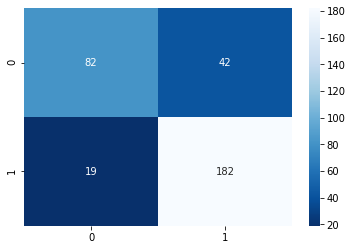

In [71]:
y_test_pred = randomized_search.predict(X_test)
cm =  confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');
 

В своей работе мы использовали метрику accuracy. Она хорошо подходит для бинарных задач классификации. Так же accuracy хорошо подходит в ситуации, когда количество объектов в каждом классе примерно одинаково.  
Лучшая модель: DecisionTreeClassifier  
Лучшие параметры C=3, max_depth=4, max_features=4, random_state=42

### Анализ важности признаков

#### Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 

Построим график с важными признаками для первого признака.

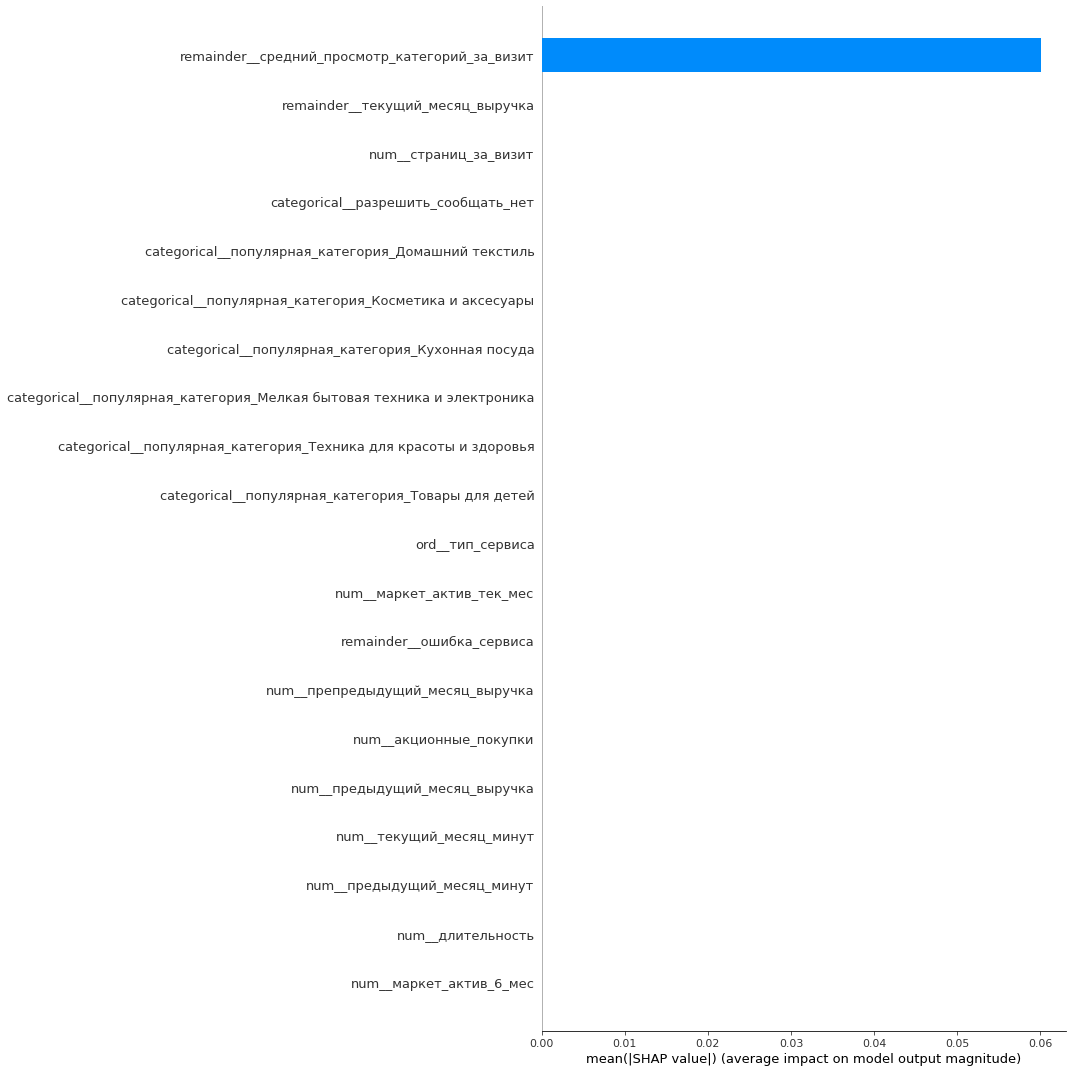

In [72]:
x_Train = pipe_final.named_steps['preprocessor'].fit_transform(X_train_sampled)

explainer = shap.TreeExplainer(randomized_search.best_estimator_.named_steps['models'], x_Train)

x_Test = pipe_final.named_steps['preprocessor'].transform(X_test)

x_Test = pd.DataFrame(x_Test, columns = randomized_search.best_estimator_['preprocessor'].get_feature_names_out())

shap_values = explainer(x_Test)

shap.summary_plot(shap_values[:, :, 1], x_Test, plot_size=(15, 15), plot_type='bar', max_display=20,
                  feature_names=randomized_search.best_estimator_['preprocessor'].get_feature_names_out(), )



У нас имеется только один важный признак это "средний просмотр категорий за визит". Т.к. информация о целевой переменной не передается непосредственно в этот признак, мы можем говорить об отсутствие утечки целевого признака. 

### Сегментация

Для начала добавим в итоговую таблицу предсказания с вероятностью снижения покупательской активности. Затем соединим итоговую таблицу с таблице `money.csv`. В которой содержатся данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

In [73]:
model = randomized_search.best_estimator_
result = pd.DataFrame(model.predict_proba(X_test)[:,0], columns = ['вероятность_снижения'], index=X_test.index)
df = X_test.merge(result, left_index=True, right_index=True)
df = df.merge(money, left_index=True, right_index=True)
df

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,вероятность_снижения,id,прибыль
554,стандарт,да,4.3,4,324,0.14,Техника для красоты и здоровья,2,7,4,4,5314.0,5160.0,5310.1,18,20,1.000000,215902,4.32
795,стандарт,да,4.8,4,799,0.24,Товары для детей,4,4,9,8,5492.0,5084.0,5268.4,11,12,0.080000,216143,3.73
753,стандарт,нет,4.1,4,629,0.13,Домашний текстиль,3,0,6,14,4626.5,5375.0,4107.8,14,17,0.117264,216101,4.17
1282,стандарт,нет,2.4,4,192,0.35,Техника для красоты и здоровья,3,3,6,10,5311.0,4651.0,6013.0,20,6,0.850000,216630,6.10
516,стандарт,да,5.4,4,777,0.25,Техника для красоты и здоровья,2,3,6,14,5141.0,5313.0,5420.5,13,14,0.117264,215864,2.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,стандарт,да,3.3,4,945,0.24,Домашний текстиль,3,3,4,13,4726.0,4852.0,4746.8,17,20,0.206522,215863,4.42
161,стандарт,да,0.9,3,839,0.40,Косметика и аксесуары,3,3,7,7,5641.0,4513.0,6996.9,12,8,0.850000,215509,3.14
372,премиум,да,3.8,4,444,0.94,Кухонная посуда,2,4,3,2,5894.0,4964.0,6081.2,8,11,0.885714,215720,2.94
714,стандарт,да,4.1,5,192,0.24,Косметика и аксесуары,4,4,6,16,5233.0,4357.0,6122.2,14,12,0.206522,216062,3.06


Рассмотрим группу клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью. Высокой вероятностью будем считать больше 0.5.

Рассмотрим распределение прибыли.

,прибыль
count,325.000000
mean,4.066462
std,1.040405
min,1.550000
25%,3.270000
50%,4.150000
75%,4.770000
max,7.430000


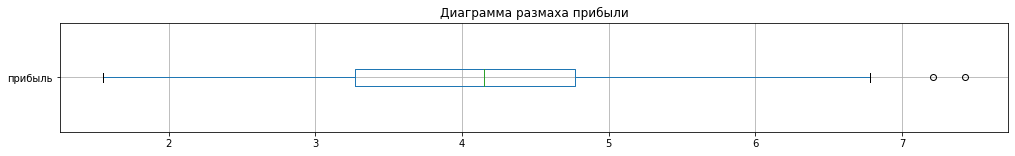

In [74]:
fig, ax = plt.subplots(figsize = (17,2))
ax = df[['прибыль']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха прибыли');
display(df[['прибыль']].describe())

Возьмем значения больше медианы

In [75]:
median = df['прибыль'].median()
df_group = df.query('(прибыль >= @median) & (вероятность_снижения >= 0.5)')
df_group.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,вероятность_снижения,id,прибыль
554,стандарт,да,4.3,4,324,0.14,Техника для красоты и здоровья,2,7,4,4,5314.0,5160.0,5310.1,18,20,1.000000,215902,4.32
1282,стандарт,нет,2.4,4,192,0.35,Техника для красоты и здоровья,3,3,6,10,5311.0,4651.0,6013.0,20,6,0.850000,216630,6.10
1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,0.833333,215349,4.16
1253,стандарт,да,4.9,5,350,0.99,Домашний текстиль,3,4,5,5,4545.0,4735.0,4840.1,14,14,0.750000,216601,4.87
54,стандарт,да,3.0,3,669,0.34,Кухонная посуда,4,2,5,4,6226.5,4881.0,7104.0,12,9,0.833333,215402,4.28


Посмотрим как среди них распределены категории покупок.

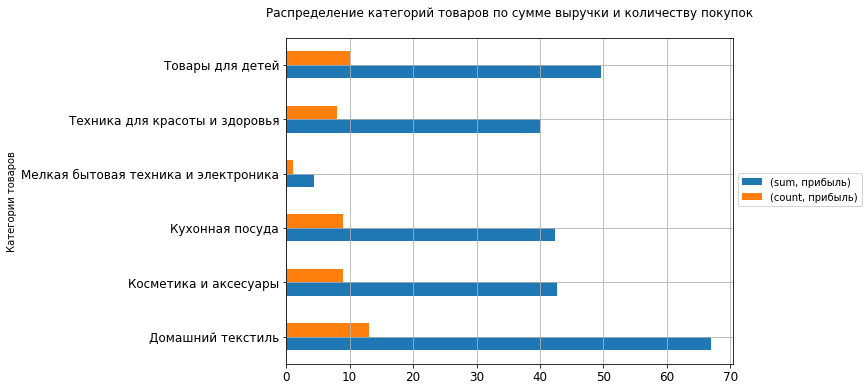

In [76]:
df_group.pivot_table(index = 'популярная_категория', values = 'прибыль', aggfunc = ['sum', 'count']) \
.plot(kind = 'barh', figsize = (8,6), grid = True, fontsize = 12)
plt.title(label = 'Распределение категорий товаров по сумме выручки и количеству покупок' + "\n")
plt.xlabel('')
plt.ylabel('Категории товаров')
plt.legend (bbox_to_anchor=(1.3,0.6)) 
plt.show()


Из графиков видно, что клиенты с выкой выручкой и высокой вероятностью снижения покупательской активности больше всего покупают товары из категорий "Товары для детей" и "Домашний текстиль".

Посмотрим на распределение согласия на получение дополнительных предложений о товаре среди выбранной группы.

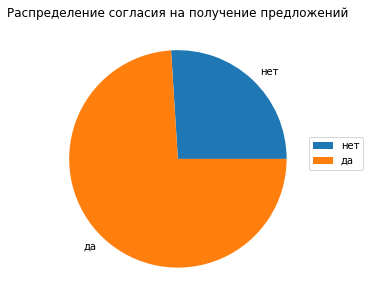

In [77]:
df_group.pivot_table(index = 'разрешить_сообщать', values = 'прибыль', aggfunc='count')\
.sort_values(by = 'прибыль' ) \
.plot(y = 'прибыль', kind='pie', 
                    figsize=(5, 5), label='', title = 'Распределение согласия на получение предложений' )
plt.legend (bbox_to_anchor=(1.2,0.6))
plt.show()

Значительное большинство клиентов дали свое согласие.

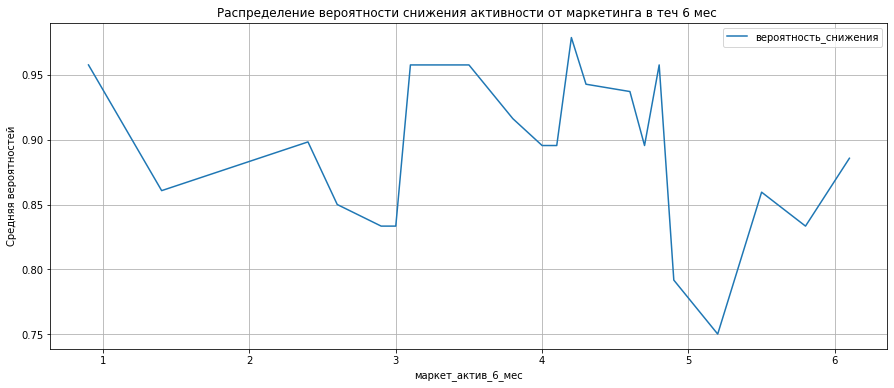

In [78]:
df_group.pivot_table(index = 'маркет_актив_6_мес', values = 'вероятность_снижения', aggfunc='mean')\
.plot(kind='line',  figsize=(15, 6), legend=True, grid=True)
plt.title('Распределение вероятности снижения активности от маркетинга в теч 6 мес ')
plt.ylabel('Средняя вероятностей')
plt.xlabel('маркет_актив_6_мес')
plt.show()

Из графика следует, что оптимально иметь за 6 месяцев в среднем 3-5 маркетинговых активностей.

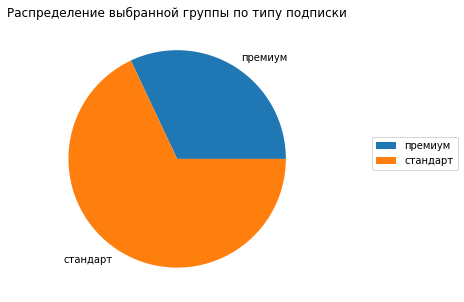

In [79]:
df_group.pivot_table(index = 'тип_сервиса', values = 'прибыль', aggfunc='count')\
.sort_values(by = 'прибыль' ) \
.plot(y = 'прибыль', kind='pie', 
                    figsize=(5, 5), label='', title = 'Распределение выбранной группы по типу подписки' )
plt.legend (bbox_to_anchor=(1.2,0.6))
plt.show()

Большинство пользователей имеет стандартную подписку. Это хорошо, т.к. именно эта категория лучше влияет на сохранение уровня покупательской активности.

Таким образом группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью, в своем большинстве имеет стандартную подписку и согласие на получение информирования о предложениях. Что может помочь в поддержании уровня покупательской активности клиентов. Таким клиентам можно рекомендавать товары из категорий "Товары для детей" и "Домашний текстиль" с частотой от 3 до 6 маркетинговых активностей за последние 6 месяцев. 

### Общий вывод:

Целью нашего проекта было разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность. В ходе исследования мы провели предобработку и исследовательский анализ данных, а также разработали и выявили лучшую модель машинного обучения. В результате исследования удалось выяснить:  
* Предпочтения клиентов по рассылке показали, что большинство из них соглашаются на получение дополнительных предложений о товарах, что может свидетельствовать о заинтересованности в новых акциях и предложениях. Тем более, что такие клиенты сохраняют свой прежний уровень активности больше, чем те, кто отказался.  

* В отношении предпочтений по сервису, большинство клиентов предпочитают использовать стандартный уровень сервиса, что может быть индикатором их довольства текущими услугами.  

* Среднее время регистрации на сайте составляет около 600 дней, причем есть как пользователи с более длительным, так и с более коротким временем с момента регистрации.  

* Анализ популярности категорий товаров показал, что самая популярная категория покупок среди клиентов - "Товары для детей", в то время как категория "Кухонная посуда" наименее популярна.  

* Cредний просмотр категорий за визит оказывает существенное влияние на уровень покупательской активности.  

* Акционные покупки и наличие неоплаченных продуктов оказывают влияние на снижение уровня покупательской активности.  

* Выбранная нами группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью, в своем большинстве имеет стандартную подписку и согласие на получение информации о предложениях. Это может помочь в поддержании уровня покупательской активности клиентов, а рекомендации товаров из категорий "Товары для детей" и "Домашний текстиль" с учетом частоты маркетинговых активностей за последние 6 месяцев могут быть эффективными для удержания клиентов.  